In [ ]:
import numpy as np
import seaborn as sns           # sns 사용할때 씀!
from scipy.stats import ttest_ind, ttest_rel

# ttest_ind -> 두 독립적인 샘플
# ttest_rel -> 두 연관적인 샘플

In [ ]:
can = np.array([101.8, 101.5, 102.6, 101, 101.8, 96.8, 102.4, 100
                ,98.8, 98.1,98.8, 98, 99.4, 95.5, 100.1, 100.5, 97.4
                ,100.2, 101.4, 98.7,101.4, 99.4, 101.7, 99, 99.7, 98.9
                ,99.5, 100, 99.7, 100.9,99.7, 99, 98.8, 99.7, 100.9, 99.9
                ,97.5, 101.5, 98.2, 99.2,98.6, 101.4, 102.1, 102.9, 100.8
                ,99.4, 103.7, 100.3, 100.2, 101.1,101.8, 100, 101.2, 100.5
                ,101.2, 101.6, 99.9, 100.5, 100.4, 98.1,100.1, 101.6, 99.3
                ,96.1, 100, 99.7, 99.7, 99.4, 101.5, 100.9,101.2, 99.9, 99.1
                ,100.7, 100.8, 100.8, 101.4, 100.3, 98.4,97.2])

tstat is  0.6596
pval is  0.5178


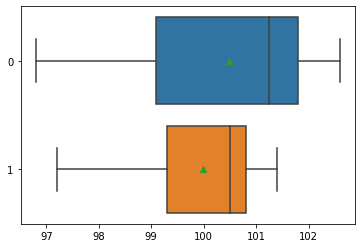

In [ ]:
A_group = can[0:10]
B_group = can[-10:]

# 두 독립적인 샘플
tstat, pval = ttest_ind(A_group, B_group, equal_var = True, alternative = 'two-sided')
# equal_var = 분산이 같은지 다른지!
print("tstat is ", np.round(tstat,4))
print("pval is ", np.round(pval,4))

sns.boxplot(data = [A_group, B_group], orient = 'h', showmeans = True)

tstat is  -3.0937
pval is  0.004


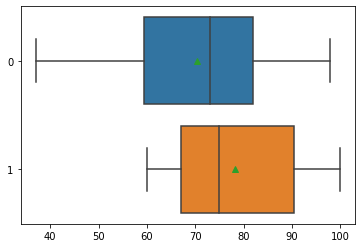

In [ ]:
midterm = np.array([80,73,70,60,88,84,65,37,91,98,52,78,40,79,59])
final = np.array([82,71,95,69,100,71,75,60,95,99,65,83,60,86,62])

# 두 연관적인 샘플
tstat, pval = ttest_rel(midterm,final, alternative = 'less') 
print("tstat is ", np.round(tstat,4))
print("pval is ", np.round(pval,4))

sns.boxplot(data = [midterm, final], orient = 'h', showmeans = True)

In [ ]:
from scipy.stats import norm

# 이거는 내가 만들어야되네....ㅎㅎ -> 메모해가자!!!
def two_prop (x,n1,y,n2,alternative):
  phat1 = x/n1
  phat2 = y/n2
  phat = (x + y) / (n1 + n2)
  tstat = (phat1 - phat2) / (np.sqrt(phat * (1- phat)) * np.sqrt(1/n1 + 1/n2))
  if alternative == 'less':
    pval = norm.cdf(tstat)
  elif alternative == 'greater':
    pval = 1 - norm.cdf(tstat)
  else:
    pval = 2 * (1 - norm.cdf(tstat))
  
  return tstat,pval

In [ ]:
tstat,pval = two_prop ( 4,25, 6,20, 'less')

print("tstat is ", np.round(tstat,4))
print("pval is ", np.round(pval,4))

tstat is  -1.1225
pval is  0.1308


In [ ]:
A_group = can[0:10]
B_group = can[-10:]

from scipy.stats import f
def test_var2(x,y,alternative):
  tstat = np.var(x,ddof=1) / np.var(y,ddof=1)
  df1 = len(x) - 1
  df2 = len(y) - 1
  if alternative == 'less':
    pval = f.cdf(tstat,df1,df2)
  elif alternative == 'greater':
    pval = 1 - f.cdf(tstat,df1,df2)
  else :
    pval = 2 * (1 - f.cdf(tstat,df1,df2))

  return tstat, pval

In [ ]:
tstat, pval = test_var2(A_group,B_group,'two-sided')
print("tstat is ", np.round(tstat,4))
print("pval is ", np.round(pval,4))

tstat is  2.1386
pval is  0.2729
